In [67]:
import time

import numpy as np
import matplotlib.pyplot as plt

from dtw import dtw

import utils

In [2]:
%ls -R spectra/

spectra/:
ardata.fits  HD110379/  HD186791/  X0319/  X0386/  X0538/  X0771/

spectra/HD110379:
BG20000                             tellstar_qvir_ordens_finalglue.fits
obs_HD110379_ordens_finalglue.fits

spectra/HD186791:
BG20000                             tellstar_35aql_ordens_finalglue.fits
obs_HD186791_ordens_finalglue.fits

spectra/X0319:
X0319_N_O_E.fits            X0319_U_O_E.fits      X0319_V_O_E.fits
X0319_N_O_E_TAC_final.fits  X0319_U_O_E_TAC.fits  X0319_V_O_E_TAC_final.fits
X0319_N_O_E_TRA.fits        X0319_U_O_E_TRA.fits  X0319_V_O_E_TRA.fits

spectra/X0386:
X0386_N_N_E.fits            X0386_U_N_E.fits      X0386_V_N_E.fits
X0386_N_N_E_TAC_final.fits  X0386_U_N_E_TAC.fits  X0386_V_N_E_TAC_final.fits
X0386_N_N_E_TRA.fits        X0386_U_N_E_TRA.fits  X0386_V_N_E_TRA.fits

spectra/X0538:
X0538_N_N_E.fits            X0538_U_N_E.fits      X0538_V_N_E.fits
X0538_N_N_E_TAC_final.fits  X0538_U_N_E_TAC.fits  X0538_V_N_E_TAC_final.fits
X0538_N_N_E_TRA.fits        X0538_U_N_E_TRA.fits 

### X0319

In [3]:
X0319_obs_flux, X0319_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E.fits')
X0319_tel_flux, X0319_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E_TRA.fits')
X0319_corr_flux, X0319_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0319/X0319_V_O_E_TAC_final.fits')

In [4]:
X0319_gt_atm = X0319_obs_flux / X0319_corr_flux

In [5]:
all(X0319_gt_atm == X0319_tel_flux)

False

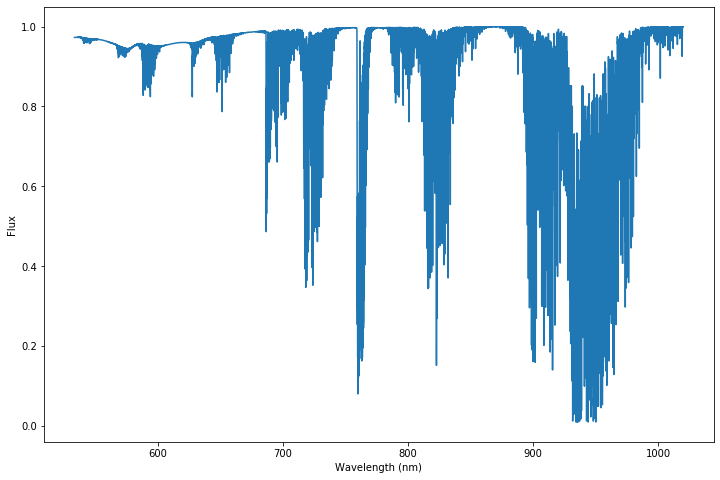

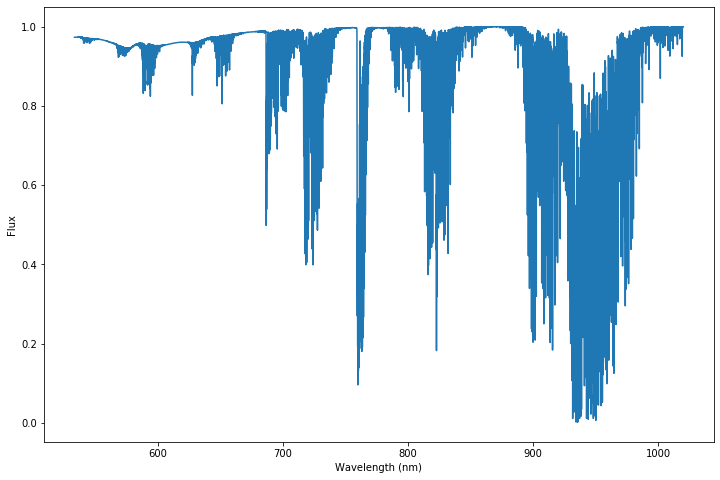

In [6]:
utils.plot_spectrum(X0319_gt_atm, X0319_tel_wl)
utils.plot_spectrum(X0319_tel_flux, X0319_tel_wl)

Formato dos dois espectros atm e atm' são extremamente parecidos. Parece ser um bom caminho,

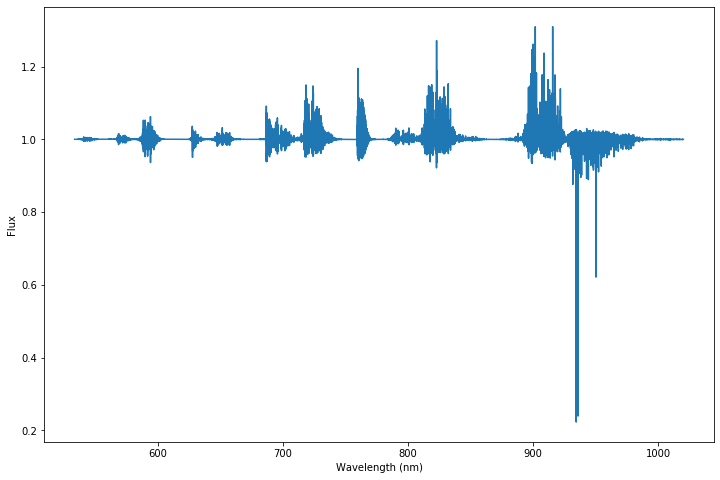

In [7]:
X0319_atm_div = X0319_tel_flux / X0319_gt_atm
utils.plot_spectrum(X0319_atm_div, X0319_tel_wl)

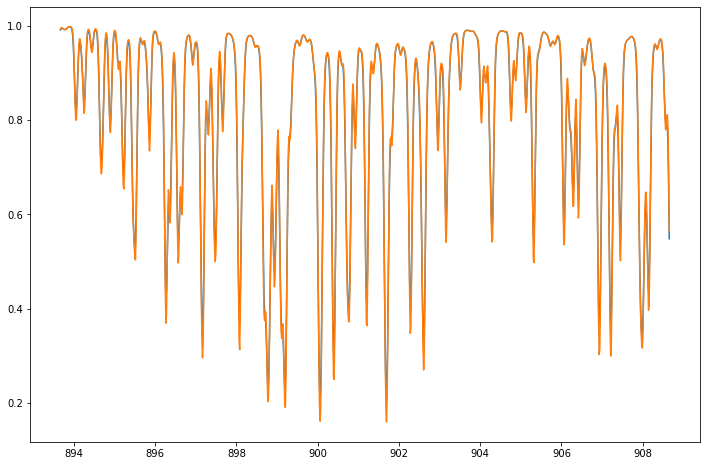

In [8]:
zoom_start = 24000
zoom_end = 25000

plt.plot(X0319_tel_wl[zoom_start:zoom_end], X0319_tel_flux[zoom_start:zoom_end])
plt.plot(X0319_tel_wl[zoom_start:zoom_end], X0319_gt_atm[zoom_start:zoom_end])

Distance: 91.98515321405769
Are all warp path indices aligned? False


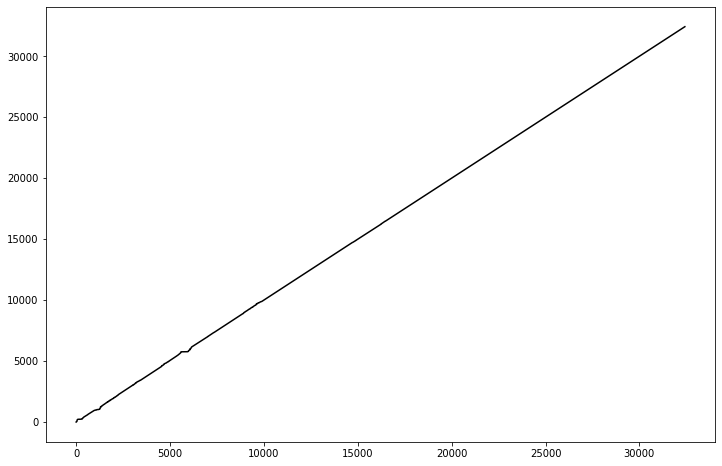

Elapsed time in seconds: 1.7579450607299805


In [9]:
start = time.time()
_, dtw_path = utils.fast_dtw_on_stellar_spectra(X0319_tel_flux, X0319_gt_atm)
end = time.time()
print('Elapsed time in seconds: {}'.format(end - start))

### X0386

In [10]:
X0386_obs_flux, X0386_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0386/X0386_V_N_E.fits')
X0386_tel_flux, X0386_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0386/X0386_V_N_E_TRA.fits')
X0386_corr_flux, X0386_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0386/X0386_V_N_E_TAC_final.fits')

In [11]:
X0386_gt_atm = X0386_obs_flux / X0386_corr_flux
all(X0386_gt_atm == X0386_tel_flux)

False

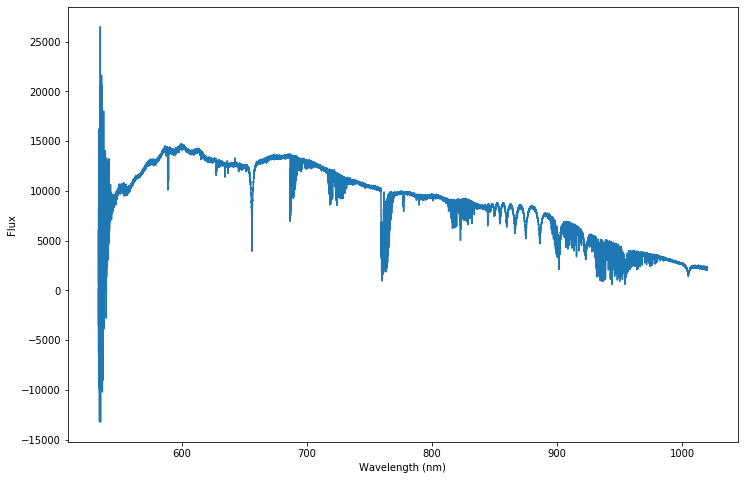

In [12]:
utils.plot_spectrum(X0386_obs_flux, X0386_obs_wl)

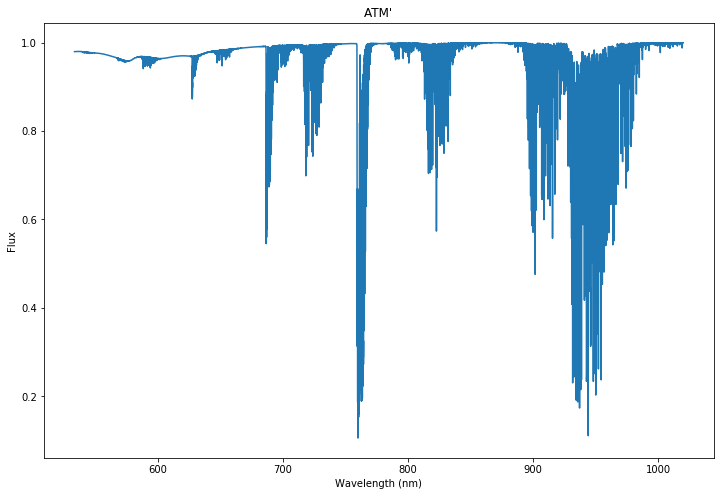

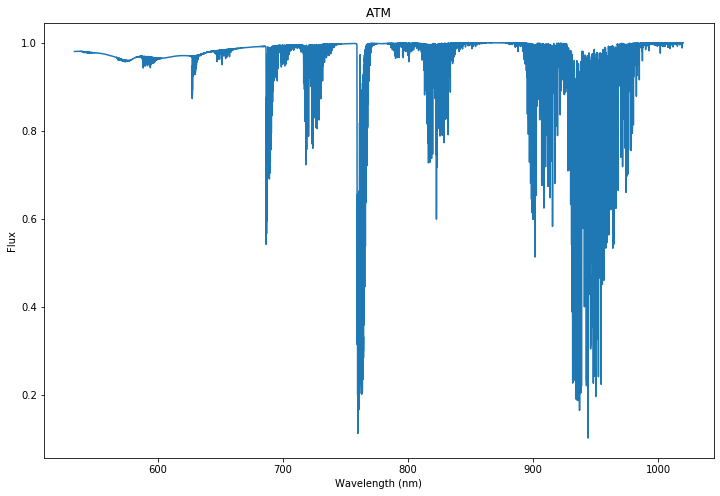

In [13]:
utils.plot_spectrum(X0386_gt_atm, X0386_tel_wl, "ATM'")
utils.plot_spectrum(X0386_tel_flux, X0386_tel_wl, 'ATM')

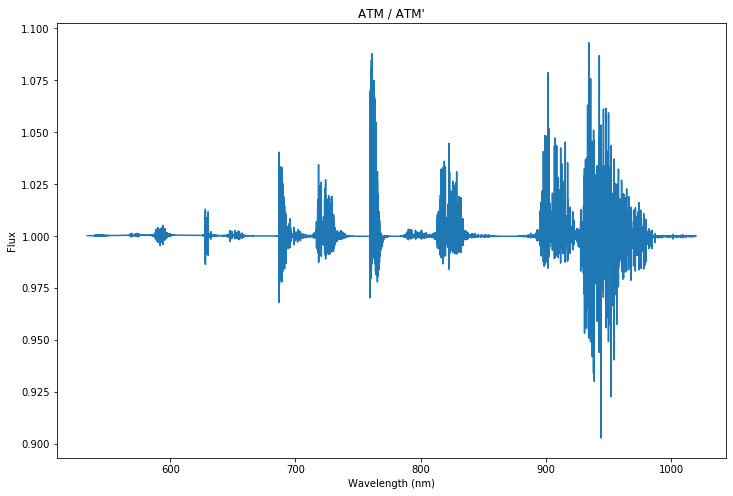

In [14]:
X0386_atm_div = X0386_tel_flux / X0386_gt_atm
utils.plot_spectrum(X0386_atm_div, X0386_tel_wl, "ATM / ATM'")

<IPython.core.display.Javascript object>


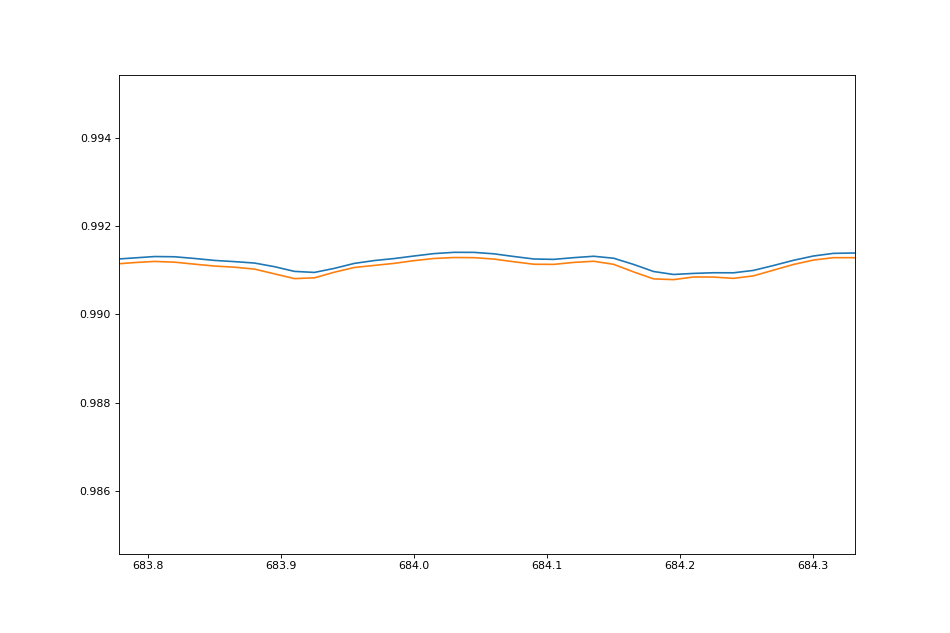

In [78]:

zoom_start = 9755
zoom_end = 10423

plt.plot(X0386_tel_wl[zoom_start:zoom_end], X0386_tel_flux[zoom_start:zoom_end])
plt.plot(X0386_tel_wl[zoom_start:zoom_end], X0386_gt_atm[zoom_start:zoom_end])

In [76]:
euclidean_norm = lambda x, y: np.abs(x - y)

x = X0386_tel_flux[zoom_start:zoom_end]
y = X0386_gt_atm[zoom_start:zoom_end]

d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)

<IPython.core.display.Javascript object>


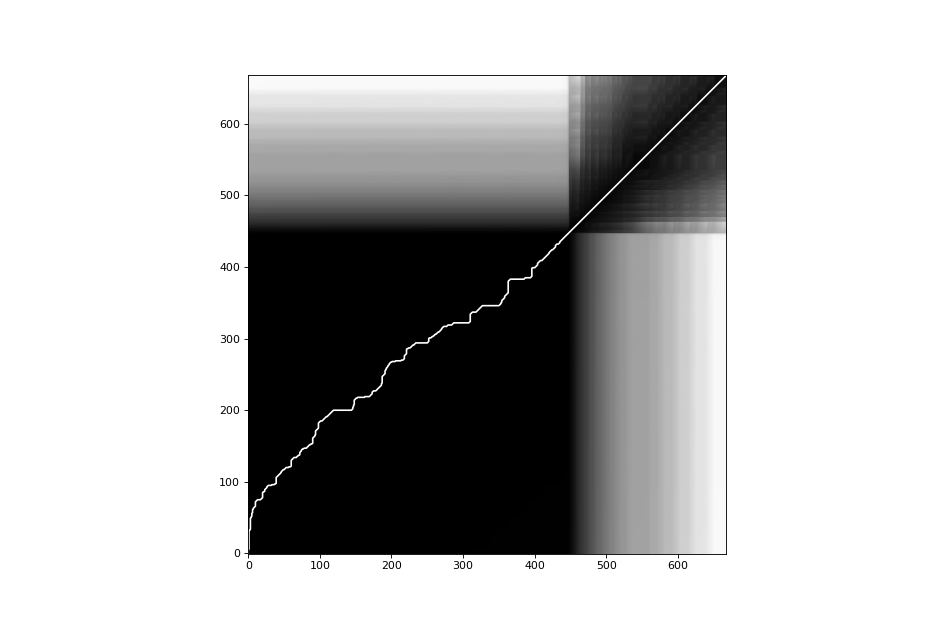

In [77]:
plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()

Distance: 38.067973852870594
Are all warp path indices aligned? False


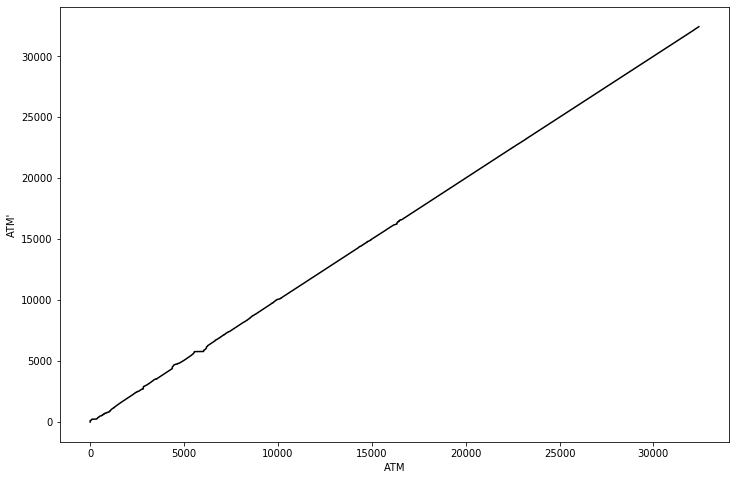

Elapsed time in seconds: 1.5950093269348145


In [35]:
start = time.time()
dtw_path, zipped_path = utils.fast_dtw_on_stellar_spectra(X0386_tel_flux, X0386_gt_atm, xlabel='ATM', ylabel="ATM'")
end = time.time()
print('Elapsed time in seconds: {}'.format(end - start))

In [36]:
X0386_aligned_gt_atm = utils.align_sequence_dtw_path(dtw_path, X0386_tel_flux)

Text(0.5, 1.0, "X0386 Reconstructed ATM' from DTW")

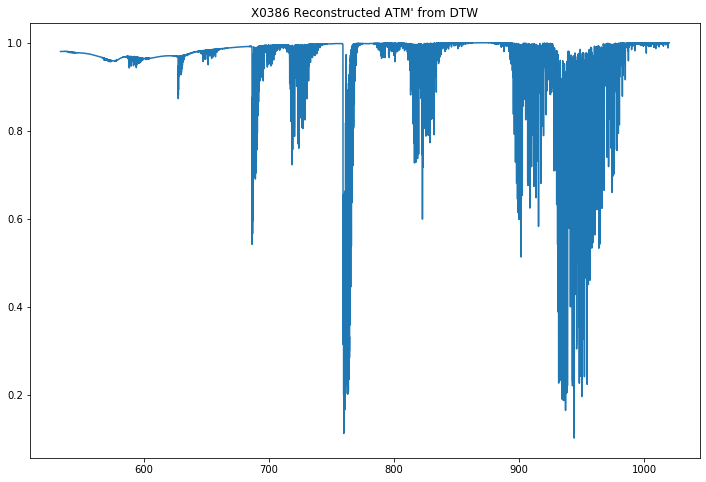

In [37]:
plt.plot(X0386_tel_wl, X0386_aligned_gt_atm)
plt.title("X0386 Reconstructed ATM' from DTW")

In [42]:
X0386_tel_wl[0]

533.67

In [43]:
X0386_tel_wl[-1]

1019.999999999559

Grafico do shift em funcao do path

In [38]:
shift = []
for (i, j) in zipped_path:
#     shift.append(X0386_gt_atm[j] - X0386_tel_flux[i])
    shift.append(j - i)

In [40]:
zipped_path

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100),

In [58]:
np_shift = np.array(shift)

In [65]:
np_shift.min()

-254

Text(0, 0.5, "ATM' - ATM")

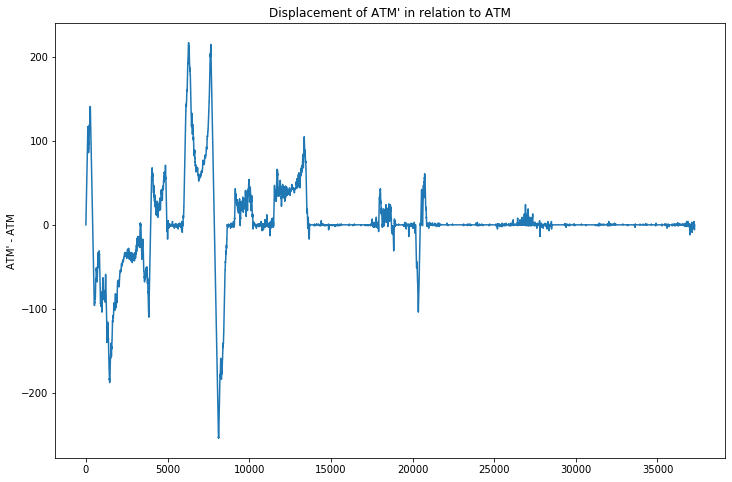

In [39]:
plt.plot(shift)
plt.title("Displacement of ATM' in relation to ATM")
plt.ylabel("ATM' - ATM")

In [73]:
utils.find_nearest(X0386_tel_wl, 680)

(9755, 9756)

In [74]:
utils.find_nearest(X0386_tel_wl, 690)

(10422, 10423)

Text(0.5, 1.0, 'Displacement in index 6622 to 11889')

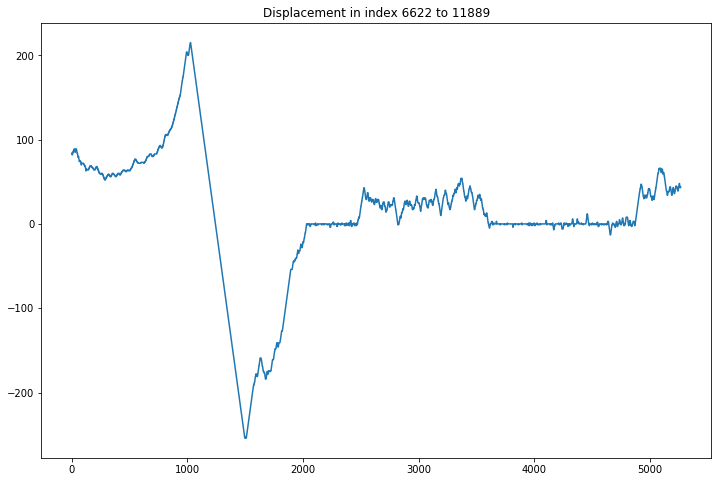

In [48]:
shift_start = 6622
shift_end = 11889

cut_shift = shift[shift_start:shift_end+1]
plt.plot(cut_shift)
plt.title(f'Displacement in index {shift_start} to {shift_end}')

Text(0.5, 1.0, 'Displacement in index 10500 to 18000')

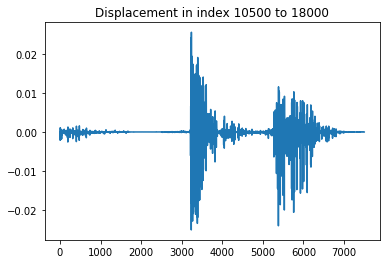

In [22]:
shift_start = 10500
shift_end = 18000

cut_shift = shift[shift_start:shift_end+1]
plt.plot(cut_shift)
plt.title('Displacement in index 10500 to 18000')

Text(0.5, 1.0, 'Displacement in index 5500 to 7000')

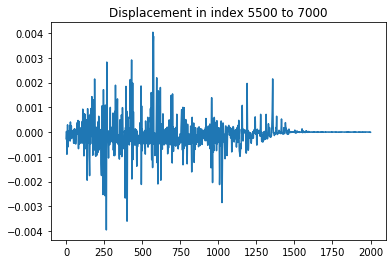

In [23]:
shift_start = 5000
shift_end = 7000

cut_shift = shift[shift_start:shift_end+1]
plt.plot(cut_shift)
plt.title('Displacement in index 5500 to 7000')

### X0538

In [24]:
X0538_obs_flux, X0538_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0538/X0538_V_N_E.fits')
X0538_tel_flux, X0538_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0538/X0538_V_N_E_TRA.fits')
X0538_corr_flux, X0538_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0538/X0538_V_N_E_TAC_final.fits')

In [25]:
X0538_gt_atm = X0538_obs_flux / X0538_corr_flux
all(X0538_gt_atm == X0538_tel_flux)

False

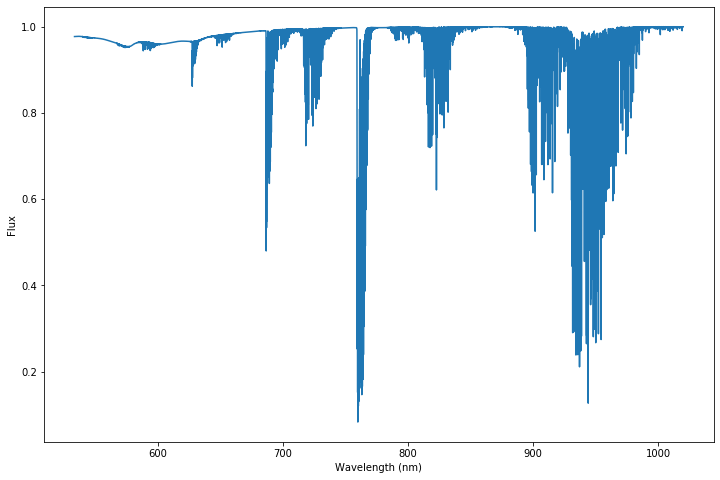

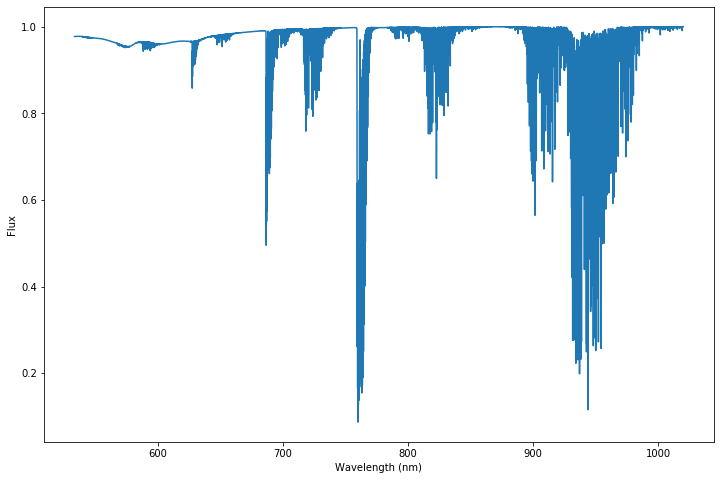

In [26]:
utils.plot_spectrum(X0538_gt_atm, X0538_tel_wl)
utils.plot_spectrum(X0538_tel_flux, X0538_tel_wl)

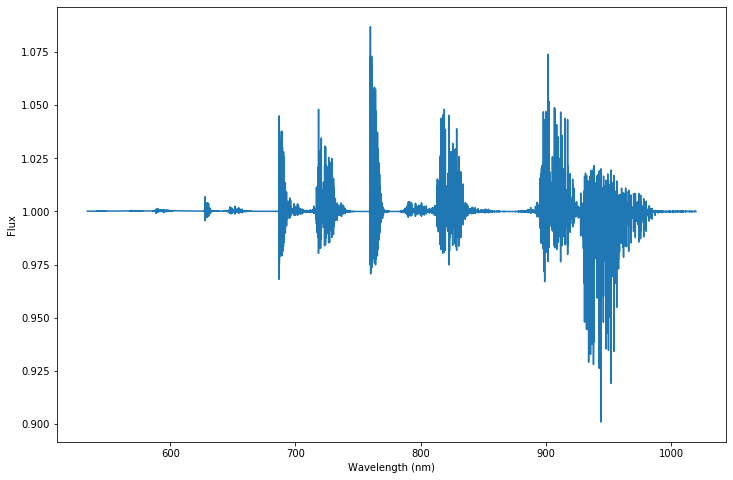

In [27]:
X0538_atm_div = X0538_tel_flux / X0538_gt_atm
utils.plot_spectrum(X0538_atm_div, X0538_tel_wl)

Distance: 34.40824748871654
Are all warp path indices aligned? False


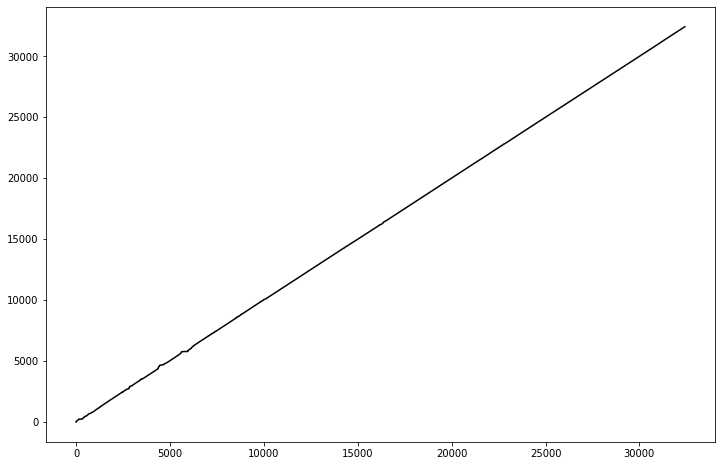

Elapsed time in seconds: 1.7244551181793213


In [28]:
start = time.time()
dtw_path = utils.fast_dtw_on_stellar_spectra(X0538_tel_flux, X0538_gt_atm)
end = time.time()
print('Elapsed time in seconds: {}'.format(end - start))

### X0771

In [29]:
X0771_obs_flux, X0771_obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0771/X0771_V_N_E.fits')
X0771_tel_flux, X0771_tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0771/X0771_V_N_E_TRA.fits')
X0771_corr_flux, X0771_corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0771/X0771_V_N_E_TAC_final.fits')

In [30]:
X0771_gt_atm = X0771_obs_flux / X0771_corr_flux
all(X0771_gt_atm == X0771_tel_flux)

False

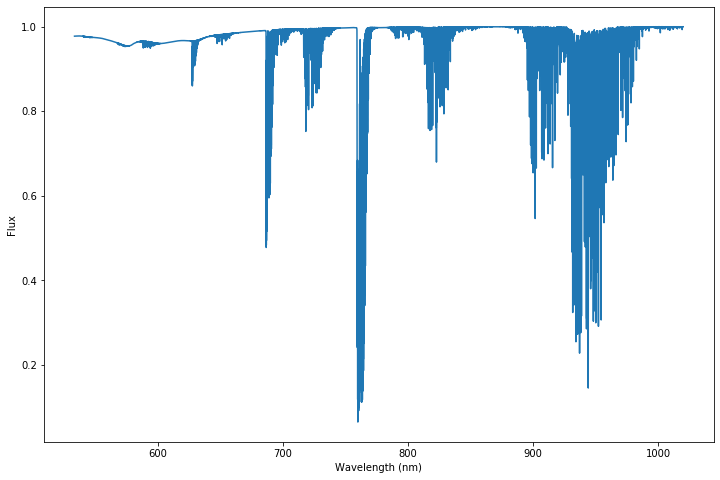

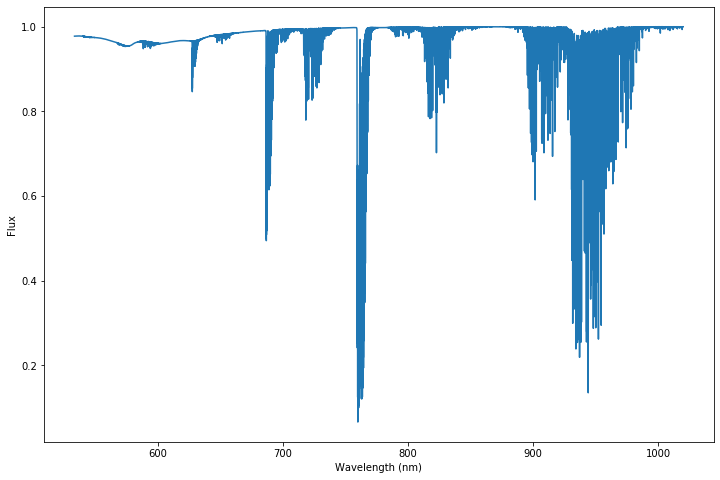

In [31]:
utils.plot_spectrum(X0771_gt_atm, X0771_tel_wl)
utils.plot_spectrum(X0771_tel_flux, X0771_tel_wl)

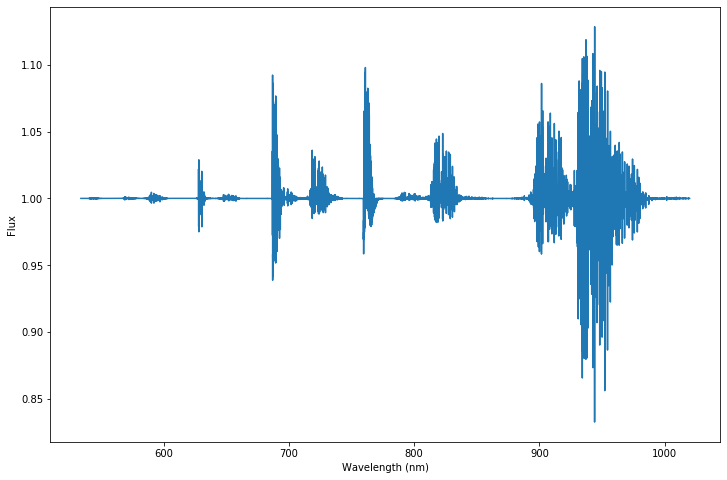

In [32]:
X0771_atm_div = X0771_tel_flux / X0771_gt_atm
utils.plot_spectrum(X0771_atm_div, X0771_tel_wl)

Distance: 50.60195073339825
Are all warp path indices aligned? False


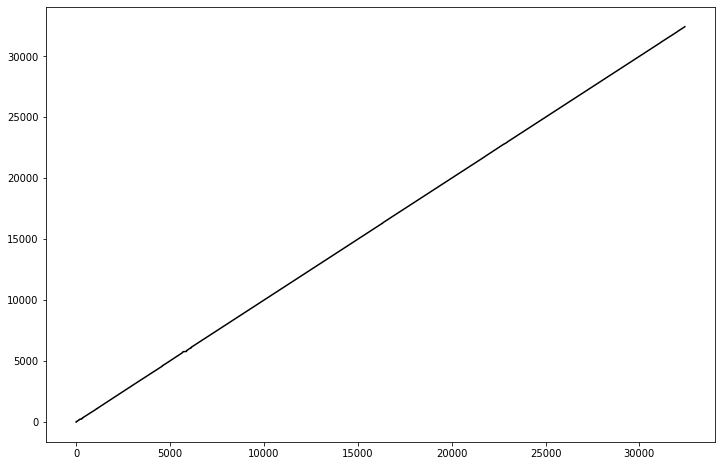

Elapsed time in seconds: 1.4501755237579346


In [33]:
start = time.time()
dtw_path = utils.fast_dtw_on_stellar_spectra(X0771_tel_flux, X0771_gt_atm)
end = time.time()
print('Elapsed time in seconds: {}'.format(end - start))